<a href="https://colab.research.google.com/github/ChibykeOS/ChibykeOS/blob/main/AI_Developer_Productivity_and_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Below are the objectives to achieve with this dataset. In addition perform any other intelligent analysis or ml work that will be of value as can be seen from the data
 Objectives:
- Perform detailed Exploratory Data Analysis (EDA) to uncover distribution patterns,
  correlations, and possible productivity indicators.
- Develop and evaluate machine learning models:
    - **Binary Classification**: Predict whether a developer will succeed in achieving the daily productivity goal
    - **Regression**: Predict cognitive load based on developer behaviors and inputs
    - **Clustering**: Identify groups of developers with similar behavioral patterns
    - **Visualization**: Use interactive and statistical plots to support pattern discovery



## Data loading

### Subtask:
Load the "ai_dev_productivity.csv" dataset.


In [1]:
import pandas as pd

try:
    df = pd.read_csv('ai_dev_productivity.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'ai_dev_productivity.csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

hours_coding  coffee_intake_mg  distractions  sleep_hours  commits  \
0          5.99               600             1          5.8        2   
1          4.72               568             2          6.9        5   
2          6.30               560             1          8.9        2   
3          8.05               600             7          6.3        9   
4          4.53               421             6          6.9        4   

   bugs_reported  ai_usage_hours  cognitive_load  task_success  
0              1            0.71             5.4             1  
1              3            1.75             4.7             1  
2              0            2.27             2.2             1  
3              5            1.40             5.9             0  
4              0            1.26             6.3             1

(500, 9)


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify missing values, data types of each column, and the distribution of key variables.


Data Shape: (500, 9)

Data Types:
 hours_coding        float64
coffee_intake_mg      int64
distractions          int64
sleep_hours         float64
commits               int64
bugs_reported         int64
ai_usage_hours      float64
cognitive_load      float64
task_success          int64
dtype: object

First few rows:
    hours_coding  coffee_intake_mg  distractions  sleep_hours  commits  \
0          5.99               600             1          5.8        2   
1          4.72               568             2          6.9        5   
2          6.30               560             1          8.9        2   
3          8.05               600             7          6.3        9   
4          4.53               421             6          6.9        4   

   bugs_reported  ai_usage_hours  cognitive_load  task_success  
0              1            0.71             5.4             1  
1              3            1.75             4.7             1  
2              0            2.27             2.

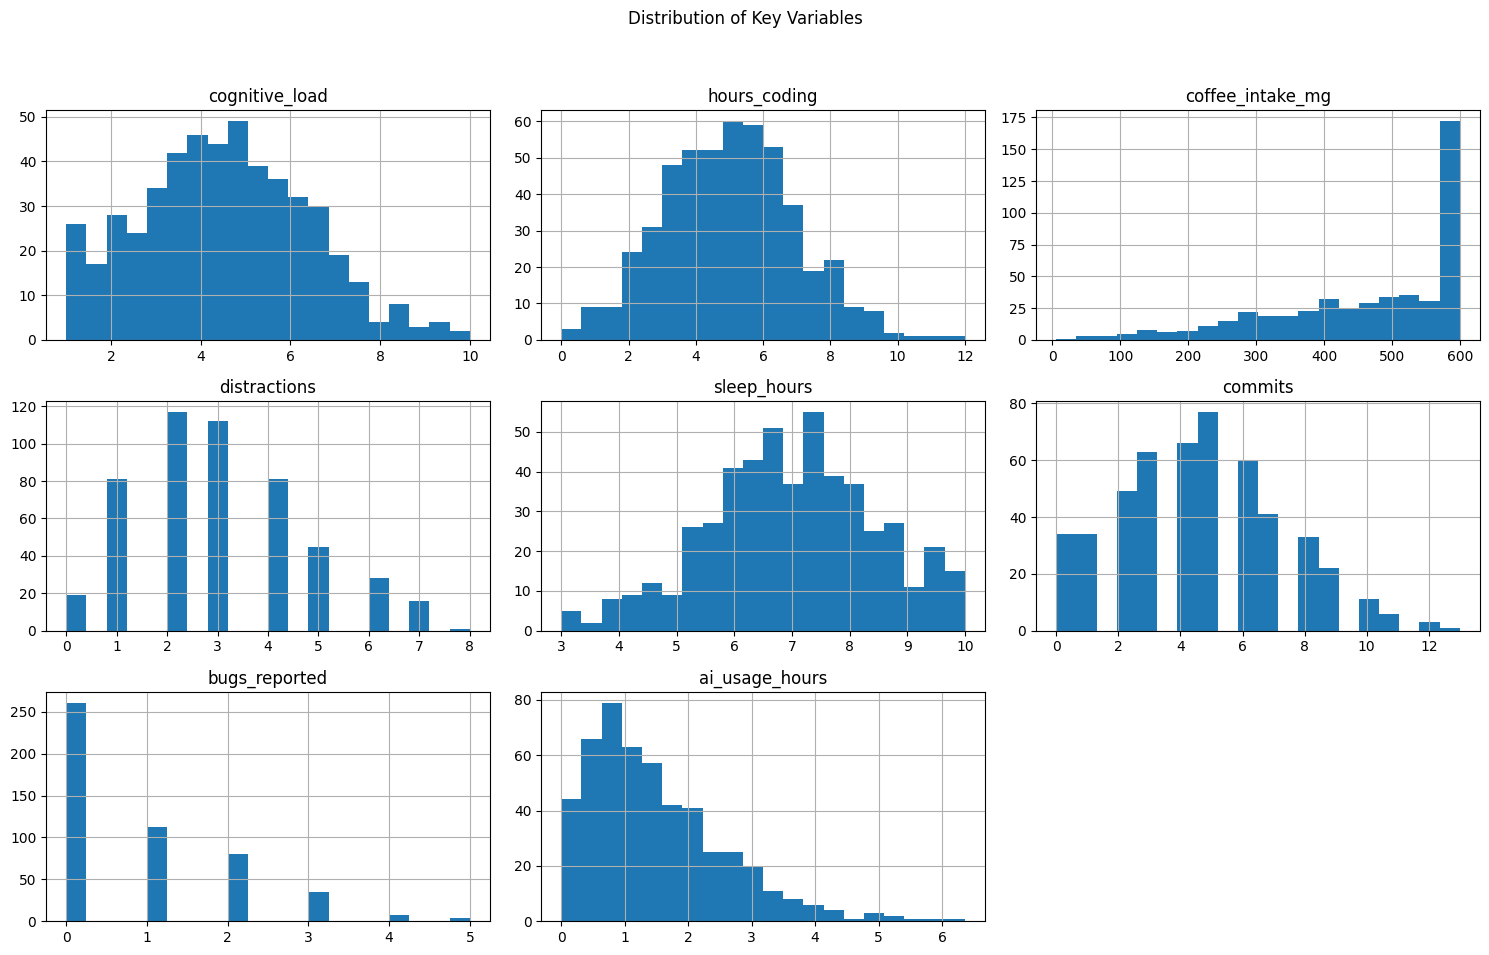

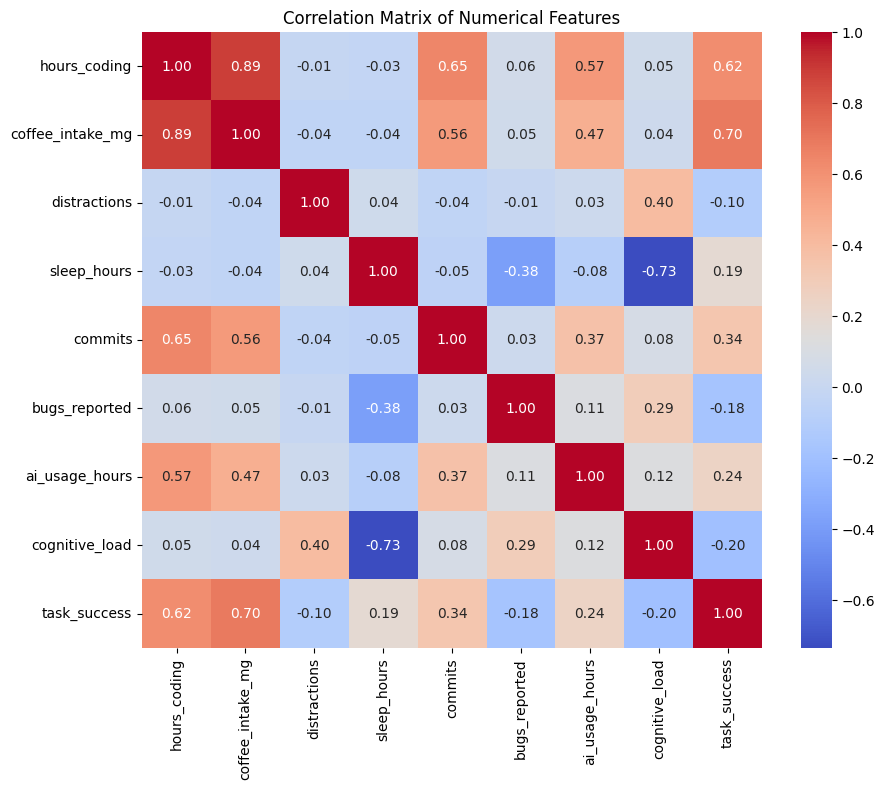

In [2]:
# Data Shape and Structure
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst few rows:\n", df.head())
print("\nLast few rows:\n", df.tail())

# Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Summary Statistics
print("\nSummary Statistics:\n", df.describe())

# Data Distribution - Histograms
import matplotlib.pyplot as plt
key_variables = ['daily_productivity', 'cognitive_load', 'hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours', 'commits', 'bugs_reported', 'ai_usage_hours']

# Check if all key variables exist in the dataframe
for var in key_variables:
    if var not in df.columns:
        print(f"Warning: Key variable '{var}' not found in the DataFrame.")
        key_variables.remove(var)  # Remove the missing variable

# Create histograms for the existing key variables
df[key_variables].hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribution of Key Variables")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

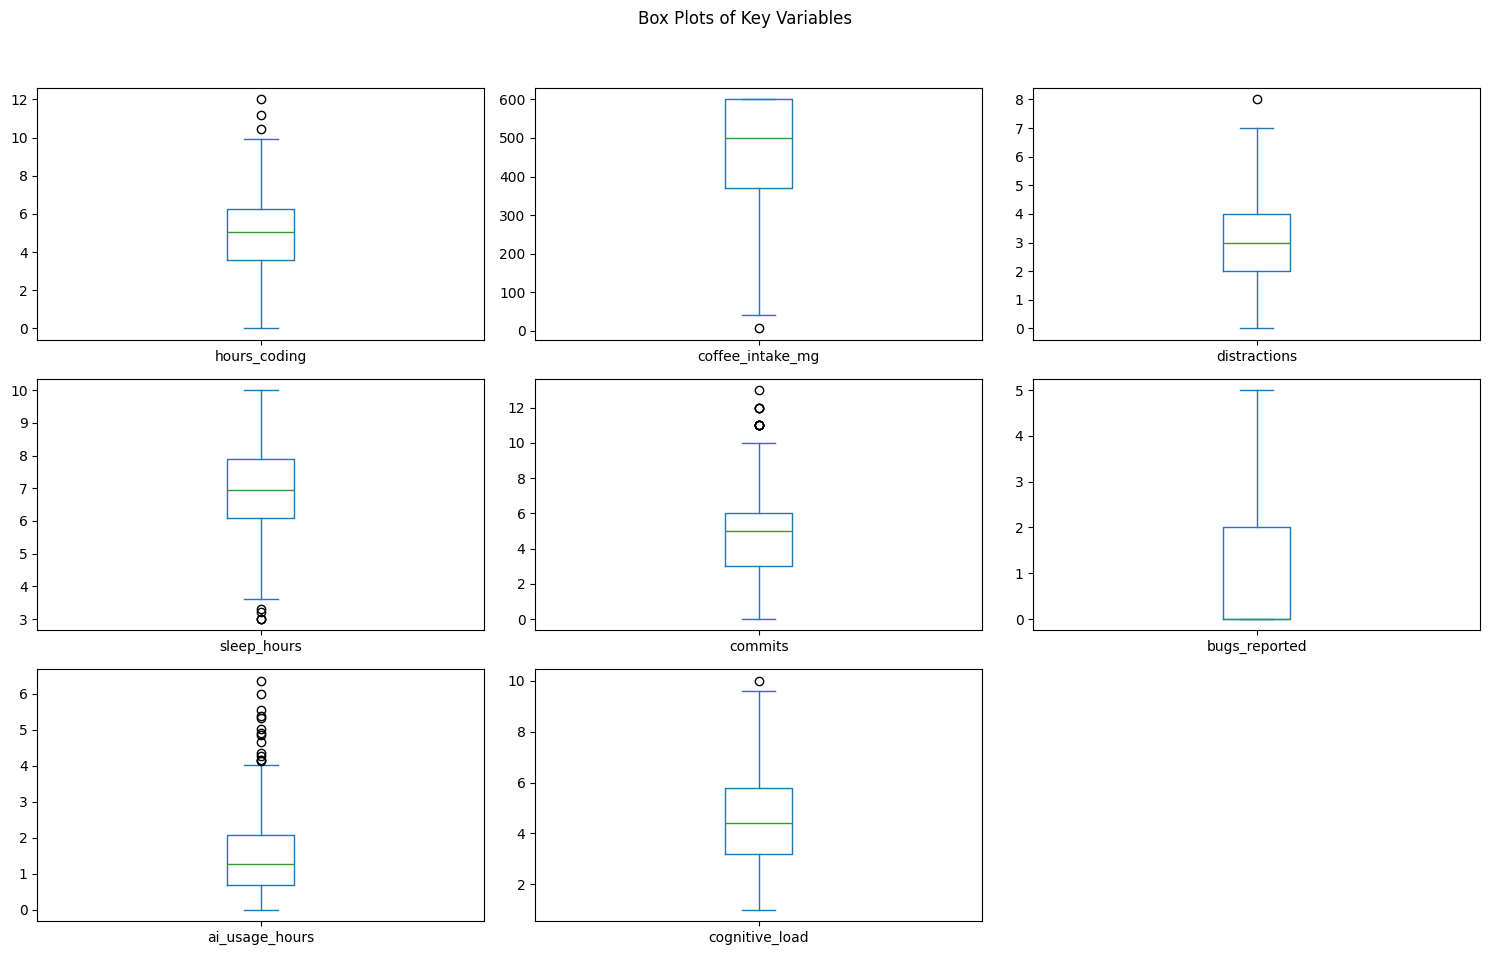


Task Success Distribution:
task_success
1    303
0    197
Name: count, dtype: int64


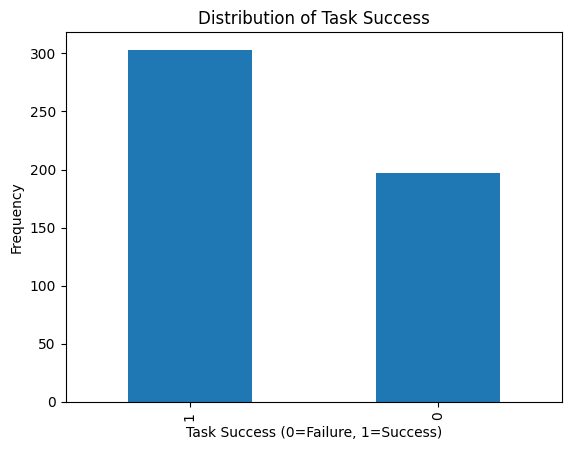

In [3]:
# Data Distribution - Box Plots
import matplotlib.pyplot as plt

key_variables = ['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours', 'commits', 'bugs_reported', 'ai_usage_hours', 'cognitive_load']

df[key_variables].plot(kind='box', subplots=True, layout=(3,3), figsize=(15,10))
plt.suptitle("Box Plots of Key Variables")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Analyze task success (as a proxy for daily productivity if 'daily_productivity' is unavailable)
print("\nTask Success Distribution:")
print(df['task_success'].value_counts())
df['task_success'].value_counts().plot(kind='bar')
plt.title('Distribution of Task Success')
plt.xlabel('Task Success (0=Failure, 1=Success)')
plt.ylabel('Frequency')
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling outliers and checking data consistency.


Detect and handle outliers in numerical features using the IQR method, and check data consistency, including data types and categorical encoding.



In [4]:
import pandas as pd
import numpy as np

# Outlier handling using IQR
numerical_features = ['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours', 'commits', 'bugs_reported', 'ai_usage_hours']
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = np.clip(df[feature], lower_bound, upper_bound)


# Data consistency checks and type conversion
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, non-numeric become NaN
        except:
            print(f"Could not convert column {col} to numeric.")
            # Handle non-numeric columns (e.g., categorical)
            if col in ['task_success']: # Check for specific columns requiring encoding
                # Do nothing, since 'task_success' already seems correctly encoded (0/1)
                pass
            else:
                # Replace non-numeric values with NaN for now
                df[col] = pd.to_numeric(df[col], errors='coerce')
    # If a column contains non-numeric data that cannot be converted
    # to numeric, those non-numeric values will be replaced by NaN.

# Impute missing values (if any)
for col in df.columns:
    if df[col].isnull().any():
        median_val = df[col].median()  # Use median for imputation
        df[col].fillna(median_val, inplace=True)


display(df.head())
display(df.describe())

hours_coding  coffee_intake_mg  distractions  sleep_hours  commits  \
0          5.99             600.0             1          5.8      2.0   
1          4.72             568.0             2          6.9      5.0   
2          6.30             560.0             1          8.9      2.0   
3          8.05             600.0             7          6.3      9.0   
4          4.53             421.0             6          6.9      4.0   

   bugs_reported  ai_usage_hours  cognitive_load  task_success  
0              1            0.71             5.4             1  
1              3            1.75             4.7             1  
2              0            2.27             2.2             1  
3              5            1.40             5.9             0  
4              0            1.26             6.3             1

hours_coding  coffee_intake_mg  distractions  sleep_hours     commits  \
count    500.000000        500.000000    500.000000   500.000000  500.000000   
mean       5.010125        463.227500      2.974000     6.978800    4.588000   
std        1.930407        142.222903      1.672998     1.448194    2.655439   
min        0.000000         23.750000      0.000000     3.400000    0.000000   
25%        3.600000        369.500000      2.000000     6.100000    3.000000   
50%        5.030000        500.500000      3.000000     6.950000    5.000000   
75%        6.275000        600.000000      4.000000     7.900000    6.000000   
max       10.287500        600.000000      7.000000    10.000000   10.500000   

       bugs_reported  ai_usage_hours  cognitive_load  task_success  
count     500.000000      500.000000      500.000000    500.000000  
mean        0.858000        1.488265        4.498200      0.606000  
std         1.102846        1.013600        1.868861      0.489124  
min         0.000000        0.000000        1.000000      0.000000  
25%         0.000000        0.697500        3.175000      0.000000  
50%         0.000000        1.260000        4.400000      1.000000  
75%         2.000000        2.070000        5.800000      1.000000  
max         5.000000        4.128750       10.000000      1.000000

## Data wrangling

### Subtask:
Data Wrangling and Feature Engineering



Create interaction terms, polynomial features, and scale numerical features. Encode the target variable 'task_success' if necessary.



In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
df['coding_ai_interaction'] = df['hours_coding'] * df['ai_usage_hours']
df['coffee_squared'] = df['coffee_intake_mg']**2
df['sleep_quality'] = df['sleep_hours'] * (1 - df['distractions'] / 10)  # Example interaction
# ... Add more engineered features as needed

# Data Scaling (using MinMaxScaler)
numerical_cols = ['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours', 'commits',
                  'bugs_reported', 'ai_usage_hours', 'cognitive_load', 'coding_ai_interaction',
                  'coffee_squared', 'sleep_quality']

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Target encoding (if needed)
# Assuming 'task_success' is already binary (0/1)
# If not, uncomment the following line:
# df['task_success'] = df['task_success'].astype(int)

df_wrangled = df.copy()
display(df_wrangled.head())

hours_coding  coffee_intake_mg  distractions  sleep_hours   commits  \
0      0.582260          1.000000      0.142857     0.363636  0.190476   
1      0.458809          0.944469      0.285714     0.530303  0.476190   
2      0.612394          0.930586      0.142857     0.833333  0.190476   
3      0.782503          1.000000      1.000000     0.439394  0.857143   
4      0.440340          0.689371      0.857143     0.530303  0.380952   

   bugs_reported  ai_usage_hours  cognitive_load  task_success  \
0            0.2        0.171965        0.488889             1   
1            0.6        0.423857        0.411111             1   
2            0.0        0.549803        0.133333             1   
3            1.0        0.339086        0.544444             0   
4            0.0        0.305177        0.588889             1   

   coding_ai_interaction  coffee_squared  sleep_quality  
0               0.100128        1.000000       0.483607  
1               0.194470        0.896015       0.524590  
2               0.336696        0.870909       0.864754  
3               0.265336        1.000000       0.028689  
4               0.134382        0.491539       0.147541

## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.



Split the data into training, validation, and testing sets using train_test_split from scikit-learn, stratifying on 'task_success' to maintain class proportions across splits.



In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_wrangled.drop('task_success', axis=1)
y = df_wrangled['task_success']

# Split data into training (70%) and temp sets (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Split temp data into validation (15%) and testing (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

## Model training

### Subtask:
Train a binary classification model to predict developer success.



Train and evaluate LogisticRegression, RandomForestClassifier, and GradientBoostingClassifier models.



In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_val)
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, logreg_predictions))
print("Precision:", precision_score(y_val, logreg_predictions))
print("Recall:", recall_score(y_val, logreg_predictions))
print("F1-score:", f1_score(y_val, logreg_predictions))

# Initialize and train Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_val)
print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_val, rf_predictions))
print("Precision:", precision_score(y_val, rf_predictions))
print("Recall:", recall_score(y_val, rf_predictions))
print("F1-score:", f1_score(y_val, rf_predictions))

# Initialize and train Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_val)
print("\nGradient Boosting Metrics:")
print("Accuracy:", accuracy_score(y_val, gb_predictions))
print("Precision:", precision_score(y_val, gb_predictions))
print("Recall:", recall_score(y_val, gb_predictions))
print("F1-score:", f1_score(y_val, gb_predictions))

# Compare the models and select the best one based on F1-score
f1_scores = {
    "Logistic Regression": f1_score(y_val, logreg_predictions),
    "Random Forest": f1_score(y_val, rf_predictions),
    "Gradient Boosting": f1_score(y_val, gb_predictions),
}
best_model = max(f1_scores, key=f1_scores.get)
print("\nBest Model based on F1-score:", best_model)

Logistic Regression Metrics:
Accuracy: 0.9466666666666667
Precision: 0.9375
Recall: 0.9782608695652174
F1-score: 0.9574468085106383

Random Forest Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Gradient Boosting Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Best Model based on F1-score: Random Forest


## Model training

### Subtask:
Train regression models to predict cognitive load.



Train regression models to predict cognitive load and evaluate their performance.



In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prepare the data for regression
X_train_reg = X_train.drop('cognitive_load', axis=1)
y_train_reg = X_train['cognitive_load']
X_val_reg = X_val.drop('cognitive_load', axis=1)
y_val_reg = X_val['cognitive_load']

# Initialize and train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
}

model_results = {}
for model_name, model in models.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_val_reg)

    mae = mean_absolute_error(y_val_reg, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_reg, y_pred))
    r2 = r2_score(y_val_reg, y_pred)

    model_results[model_name] = {"MAE": mae, "RMSE": rmse, "R-squared": r2}
    print(f"{model_name} Metrics:")
    print(f"  MAE: {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R-squared: {r2:.4f}")

# Find the best model based on RMSE (lower is better)
best_model_name = min(model_results, key=lambda k: model_results[k]["RMSE"])
print(f"\nBest Model based on RMSE: {best_model_name}")

Linear Regression Metrics:
  MAE: 0.0896
  RMSE: 0.1135
  R-squared: 0.6982
Random Forest Metrics:
  MAE: 0.0968
  RMSE: 0.1204
  R-squared: 0.6598
Gradient Boosting Metrics:
  MAE: 0.0930
  RMSE: 0.1171
  R-squared: 0.6783

Best Model based on RMSE: Linear Regression


## Model training

### Subtask:
Train a K-means clustering model to identify groups of developers with similar behavioral patterns.


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Select features for clustering (exclude target variables)
features_for_clustering = ['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours', 'commits',
                           'bugs_reported', 'ai_usage_hours', 'coding_ai_interaction', 'coffee_squared',
                           'sleep_quality']
X_cluster = df_wrangled[features_for_clustering]

# Determine optimal number of clusters using silhouette analysis (example)
best_score = -1
best_k = 2  # Initialize with a reasonable value
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_cluster)
    silhouette_avg = silhouette_score(X_cluster, cluster_labels)
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k
print(f"Optimal number of clusters (based on silhouette score): {best_k}")


# Train KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_wrangled['cluster'] = kmeans.fit_predict(X_cluster)

# Evaluate the model
print(f"Silhouette Score for KMeans with k={best_k}: {best_score}")

# Display some information about the clusters
display(df_wrangled.head())
display(df_wrangled.groupby('cluster').agg(['mean', 'std']))

Optimal number of clusters (based on silhouette score): 2
Silhouette Score for KMeans with k=2: 0.2798998643249858


hours_coding  coffee_intake_mg  distractions  sleep_hours   commits  \
0      0.582260          1.000000      0.142857     0.363636  0.190476   
1      0.458809          0.944469      0.285714     0.530303  0.476190   
2      0.612394          0.930586      0.142857     0.833333  0.190476   
3      0.782503          1.000000      1.000000     0.439394  0.857143   
4      0.440340          0.689371      0.857143     0.530303  0.380952   

   bugs_reported  ai_usage_hours  cognitive_load  task_success  \
0            0.2        0.171965        0.488889             1   
1            0.6        0.423857        0.411111             1   
2            0.0        0.549803        0.133333             1   
3            1.0        0.339086        0.544444             0   
4            0.0        0.305177        0.588889             1   

   coding_ai_interaction  coffee_squared  sleep_quality  cluster  
0               0.100128        1.000000       0.483607        1  
1               0.194470        0.896015       0.524590        1  
2               0.336696        0.870909       0.864754        1  
3               0.265336        1.000000       0.028689        1  
4               0.134382        0.491539       0.147541        0

hours_coding           coffee_intake_mg           distractions  \
                mean       std             mean       std         mean   
cluster                                                                  
0           0.325150  0.107477         0.539002  0.193531     0.422222   
1           0.619443  0.124762         0.945636  0.075070     0.427013   

                  sleep_hours             commits            ...  \
              std        mean       std      mean       std  ...   
cluster                                                      ...   
0        0.231368    0.558586  0.219697  0.286561  0.194263  ...   
1        0.245466    0.528871  0.218690  0.560000  0.227723  ...   

        cognitive_load           task_success           coding_ai_interaction  \
                  mean       std         mean       std                  mean   
cluster                                                                         
0             0.364247  0.209213     0.271111  0.445524              0.078402   
1             0.408687  0.204578     0.880000  0.325554              0.301932   

                  coffee_squared           sleep_quality            
              std           mean       std          mean       std  
cluster                                                             
0        0.061479       0.343894  0.190065      0.448172  0.198781  
1        0.204955       0.903330  0.131016      0.431386  0.223029  

[2 rows x 24 columns]

## Model optimization

### Subtask:
Optimize the trained classification models (Logistic Regression, Random Forest, and Gradient Boosting) using hyperparameter tuning.


In [10]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Hyperparameter tuning for Logistic Regression
param_grid_logreg = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # 'l1' penalty requires 'liblinear' or 'saga' solver
}

logreg_grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=10000), param_grid_logreg, cv=5, scoring='f1')
logreg_grid_search.fit(X_val, y_val)
best_logreg = logreg_grid_search.best_estimator_

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, n_iter=10, cv=5, scoring='f1', random_state=42)
rf_grid_search.fit(X_val, y_val)
best_rf = rf_grid_search.best_estimator_

# Hyperparameter tuning for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}
gb_random_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, n_iter=10, cv=5, scoring='f1', random_state=42)
gb_random_search.fit(X_val, y_val)
best_gb = gb_random_search.best_estimator_

# Retrain models on combined training and validation sets
best_logreg.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))
best_rf.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))
best_gb.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

# Evaluate the optimized models on the test set
models = {
    "Logistic Regression": best_logreg,
    "Random Forest": best_rf,
    "Gradient Boosting": best_gb
}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name} - Test Set Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("-" * 30)

Logistic Regression - Test Set Performance:
Accuracy: 0.9067
Precision: 0.8800
Recall: 0.9778
F1-score: 0.9263
------------------------------
Random Forest - Test Set Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
------------------------------
Gradient Boosting - Test Set Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
------------------------------


## Model evaluation

### Subtask:
Evaluate the performance of the regression models (Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor) on the test set.


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prepare the test data for regression
X_test_reg = X_test.drop('cognitive_load', axis=1)
y_test_reg = X_test['cognitive_load']

# Assuming models (Linear Regression, Random Forest Regressor, Gradient Boosting Regressor) are already trained
# Evaluate the models on the test set
model_results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
    r2 = r2_score(y_test_reg, y_pred)
    model_results[model_name] = {"MAE": mae, "RMSE": rmse, "R-squared": r2}
    print(f"{model_name} Test Set Metrics:")
    print(f"  MAE: {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R-squared: {r2:.4f}")

# Find the best model based on RMSE
best_model_name = min(model_results, key=lambda k: model_results[k]["RMSE"])
print(f"\nBest Model based on RMSE: {best_model_name}")

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- cognitive_load



The error message indicates that the `cognitive_load` column is missing from `X_test_reg` during prediction, but it was present during model training.  We need to correct this by removing `cognitive_load` from the training data as well.  Then, retrain the models and evaluate them.



In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prepare the data for regression, removing 'cognitive_load' from training data
X_train_reg = X_train.drop('cognitive_load', axis=1)
y_train_reg = X_train['cognitive_load']
X_val_reg = X_val.drop('cognitive_load', axis=1)
y_val_reg = X_val['cognitive_load']
X_test_reg = X_test.drop('cognitive_load', axis=1)
y_test_reg = X_test['cognitive_load']

# Initialize and train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
}

model_results = {}
for model_name, model in models.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)

    mae = mean_absolute_error(y_test_reg, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
    r2 = r2_score(y_test_reg, y_pred)

    model_results[model_name] = {"MAE": mae, "RMSE": rmse, "R-squared": r2}
    print(f"{model_name} Test Set Metrics:")
    print(f"  MAE: {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R-squared: {r2:.4f}")

# Find the best model based on RMSE (lower is better)
best_model_name = min(model_results, key=lambda k: model_results[k]["RMSE"])
print(f"\nBest Model based on RMSE: {best_model_name}")

Linear Regression Test Set Metrics:
  MAE: 0.0939
  RMSE: 0.1121
  R-squared: 0.6640
Random Forest Test Set Metrics:
  MAE: 0.0942
  RMSE: 0.1156
  R-squared: 0.6425
Gradient Boosting Test Set Metrics:
  MAE: 0.0967
  RMSE: 0.1153
  R-squared: 0.6443

Best Model based on RMSE: Linear Regression


## Data visualization

### Subtask:
Visualize the results of the clustering analysis.


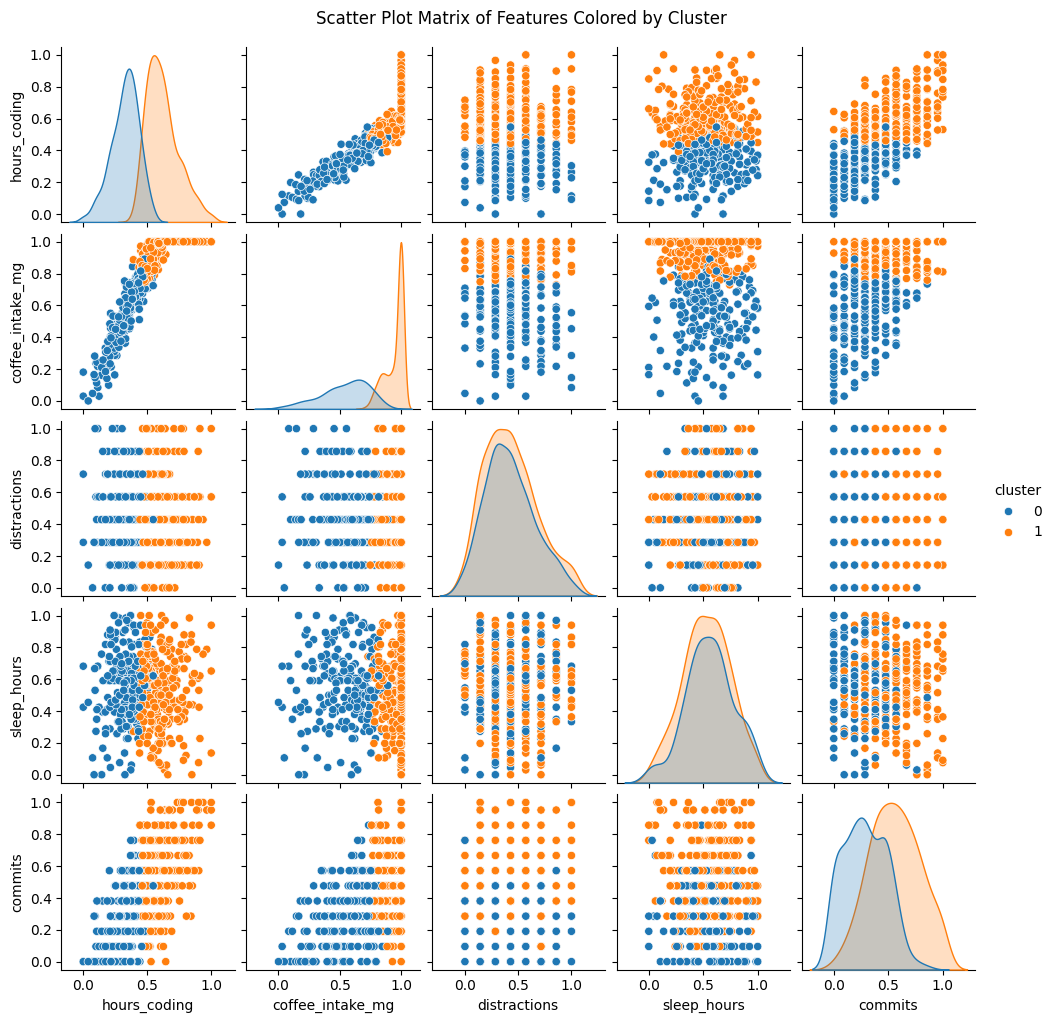

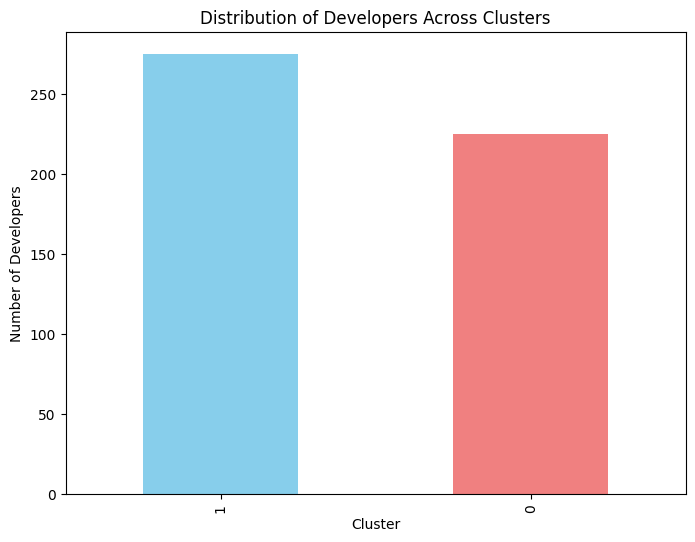

<ipython-input-13-51779ca9bf72>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_wrangled, palette="Set2")
<ipython-input-13-51779ca9bf72>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_wrangled, palette="Set2")
<ipython-input-13-51779ca9bf72>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_wrangled, palette="Set2")
<ipython-input-13-51779ca9bf72>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

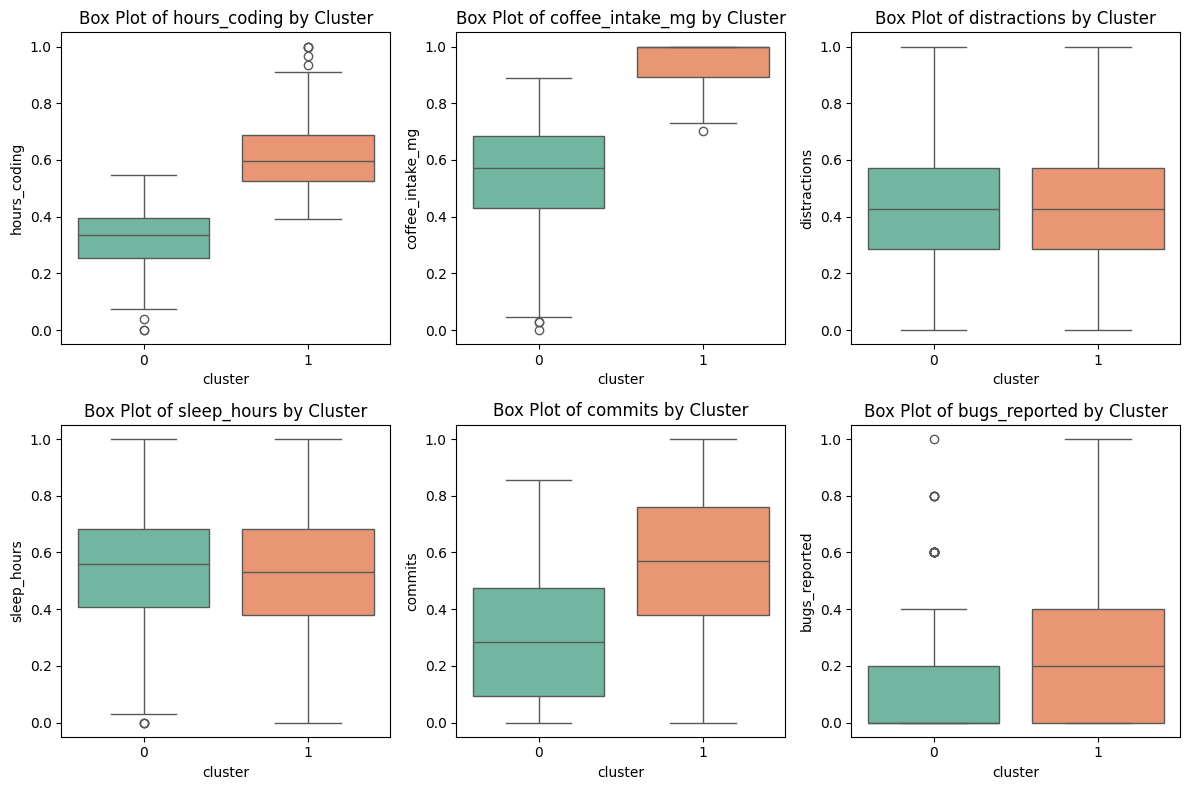

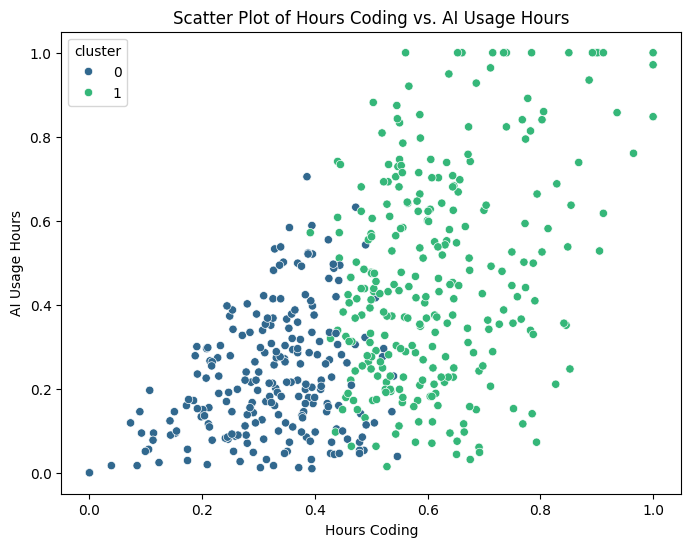

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot matrix
sns.pairplot(df_wrangled, hue='cluster', vars=features_for_clustering[:5], height=2) # Adjust features and height as needed
plt.suptitle('Scatter Plot Matrix of Features Colored by Cluster', y=1.02)
plt.show()

# 2. Bar chart of cluster distribution
plt.figure(figsize=(8, 6))
df_wrangled['cluster'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Developers Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Developers')
plt.show()

# 3. Box plots of key features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_for_clustering[:6]): # Adjust number of features as needed
  plt.subplot(2, 3, i+1)
  sns.boxplot(x='cluster', y=feature, data=df_wrangled, palette="Set2")
  plt.title(f'Box Plot of {feature} by Cluster')
plt.tight_layout()
plt.show()

# 4. Additional visualization: Scatter plot of two features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hours_coding', y='ai_usage_hours', hue='cluster', data=df_wrangled, palette="viridis") # Customize features
plt.title('Scatter Plot of Hours Coding vs. AI Usage Hours')
plt.xlabel('Hours Coding')
plt.ylabel('AI Usage Hours')
plt.show()

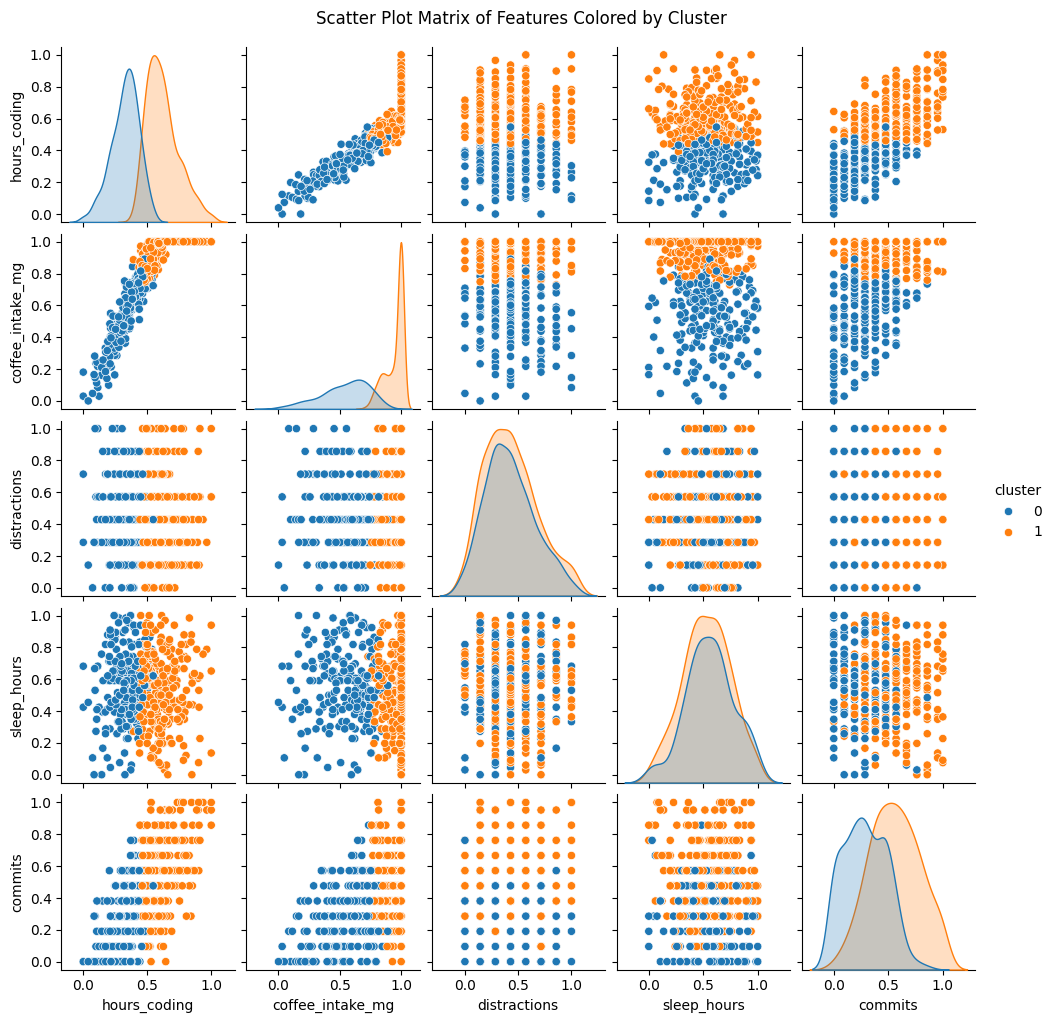

<ipython-input-14-c5628ea8f68d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df_wrangled, palette="viridis")


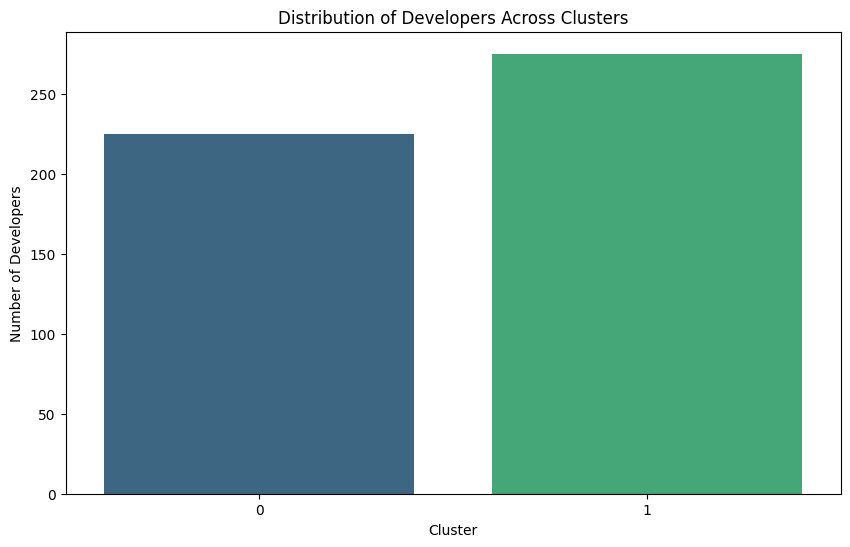

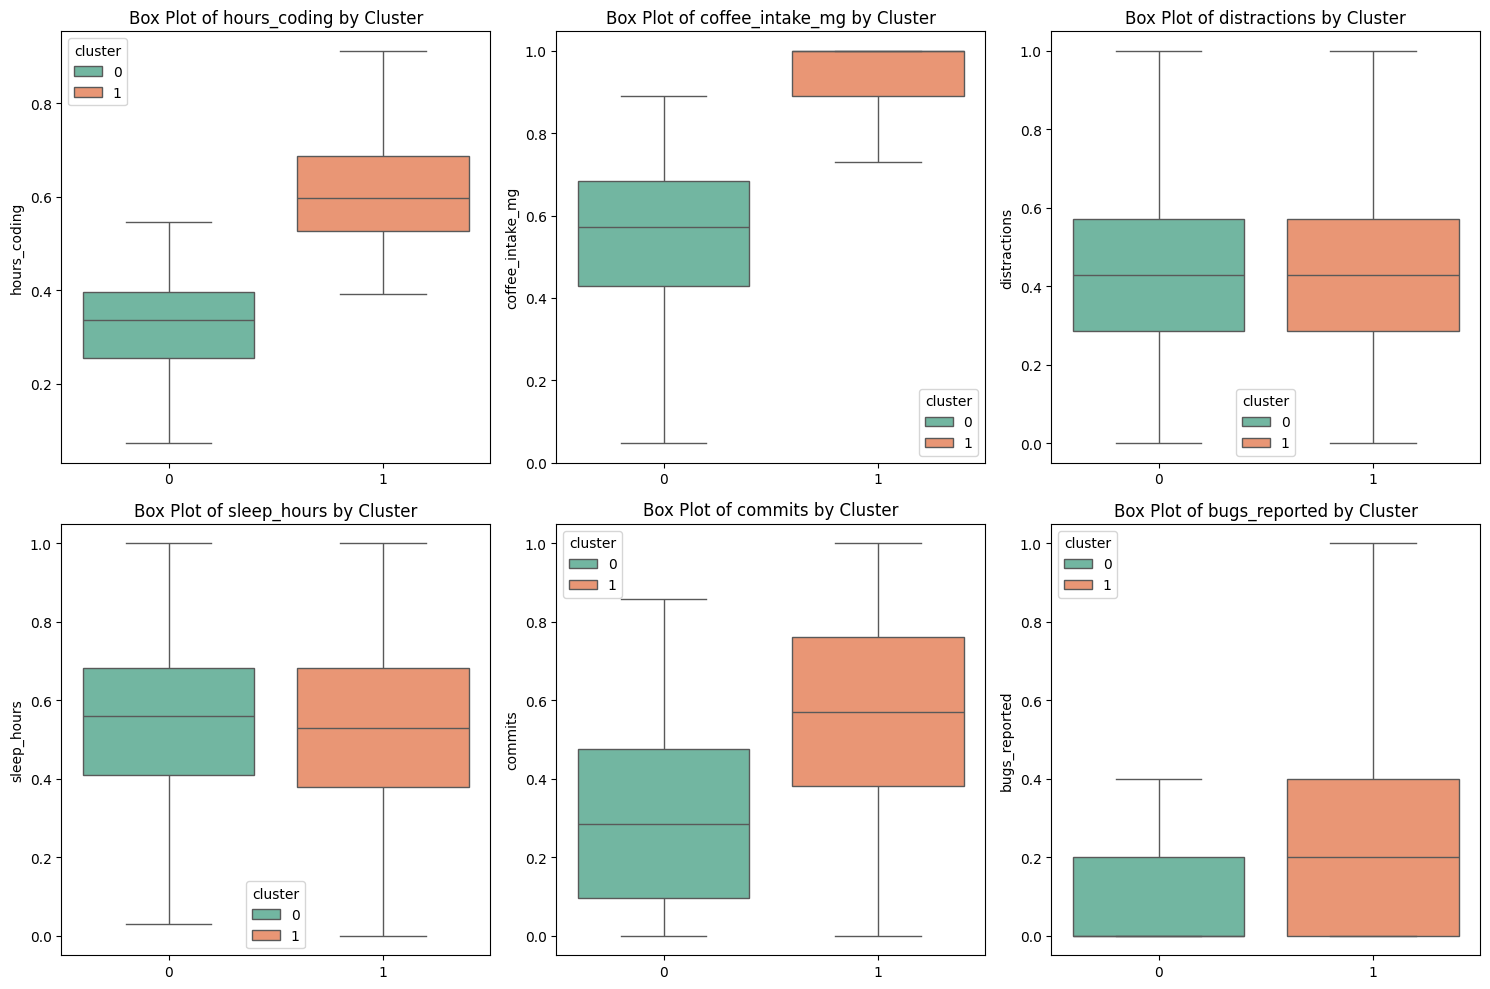

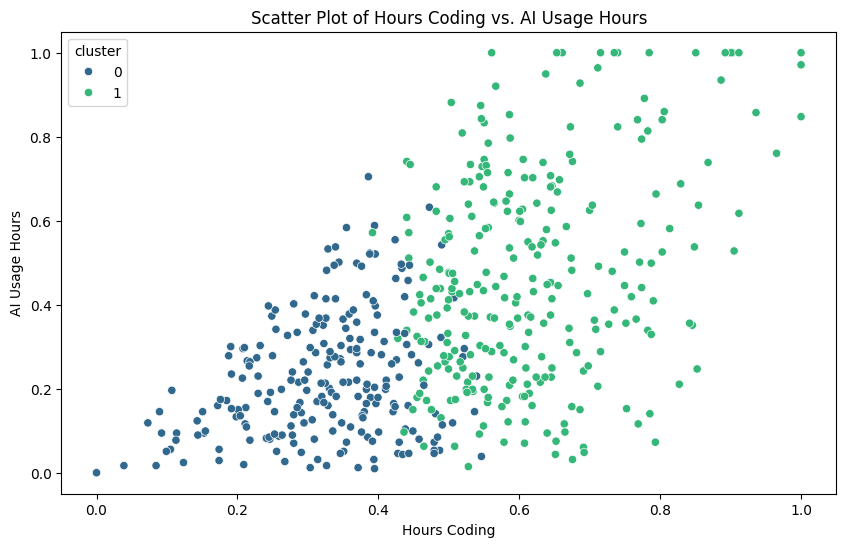

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot matrix
sns.pairplot(df_wrangled, hue='cluster', vars=features_for_clustering[:5], height=2)
plt.suptitle('Scatter Plot Matrix of Features Colored by Cluster', y=1.02)
plt.show()

# 2. Bar chart of cluster distribution
plt.figure(figsize=(10, 6))  # Increased figure size
sns.countplot(x='cluster', data=df_wrangled, palette="viridis")
plt.title('Distribution of Developers Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Developers')
plt.show()

# 3. Box plots of key features
plt.figure(figsize=(15, 10)) # Increased figure size
for i, feature in enumerate(features_for_clustering[:6]):
  plt.subplot(2, 3, i+1)
  sns.boxplot(x='cluster', y=feature, data=df_wrangled, hue='cluster', palette="Set2", showfliers=False) # Added hue and removed showfliers
  plt.title(f'Box Plot of {feature} by Cluster')
  plt.xlabel('') # Remove x-axis label for cleaner look
plt.tight_layout()
plt.show()

# 4. Additional visualization: Scatter plot of two features
plt.figure(figsize=(10, 6)) # Increased figure size
sns.scatterplot(x='hours_coding', y='ai_usage_hours', hue='cluster', data=df_wrangled, palette="viridis")
plt.title('Scatter Plot of Hours Coding vs. AI Usage Hours')
plt.xlabel('Hours Coding')
plt.ylabel('AI Usage Hours')
plt.show()



---


The previous attempts to generate visualizations have resulted in warnings and potentially suboptimal plots. we will work to correct that.



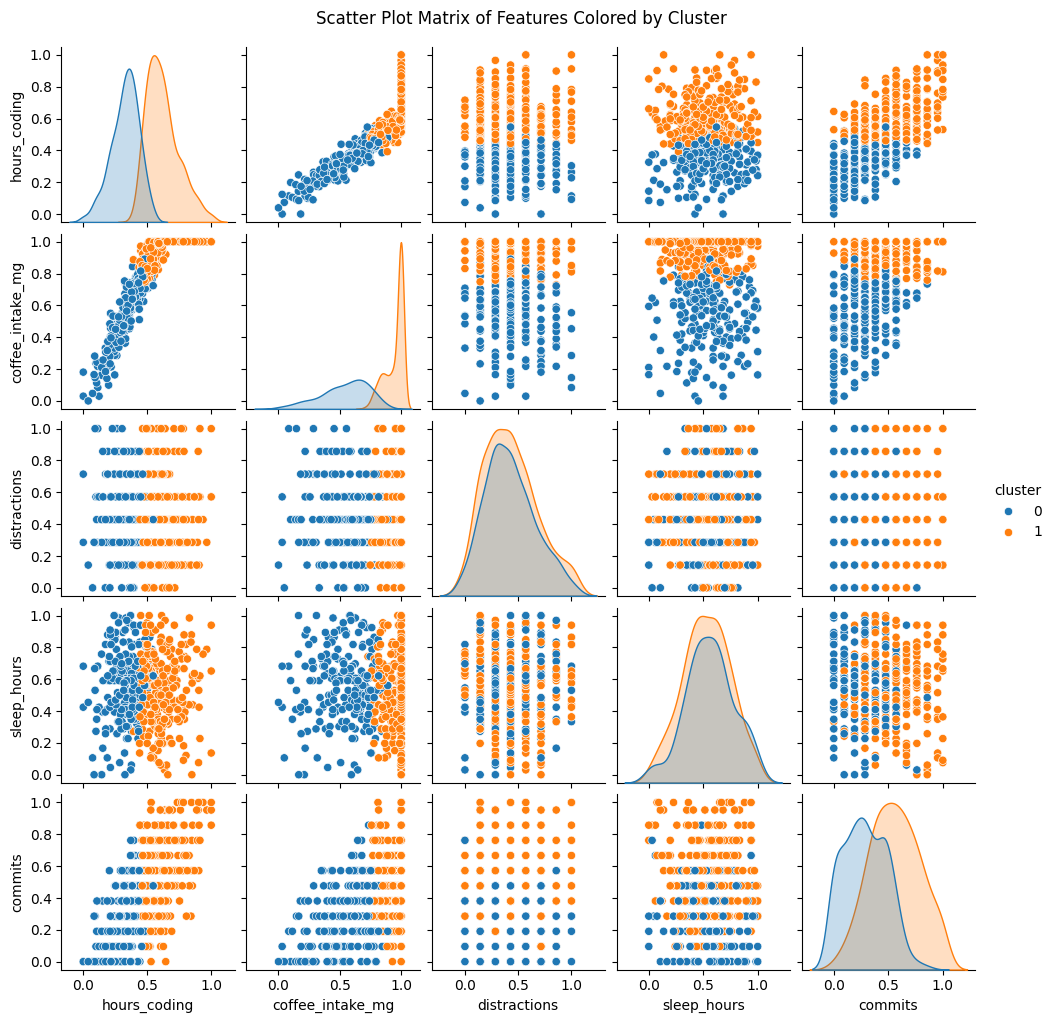

<ipython-input-15-6a4d39cc11ba>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df_wrangled, palette="viridis") #Corrected palette usage


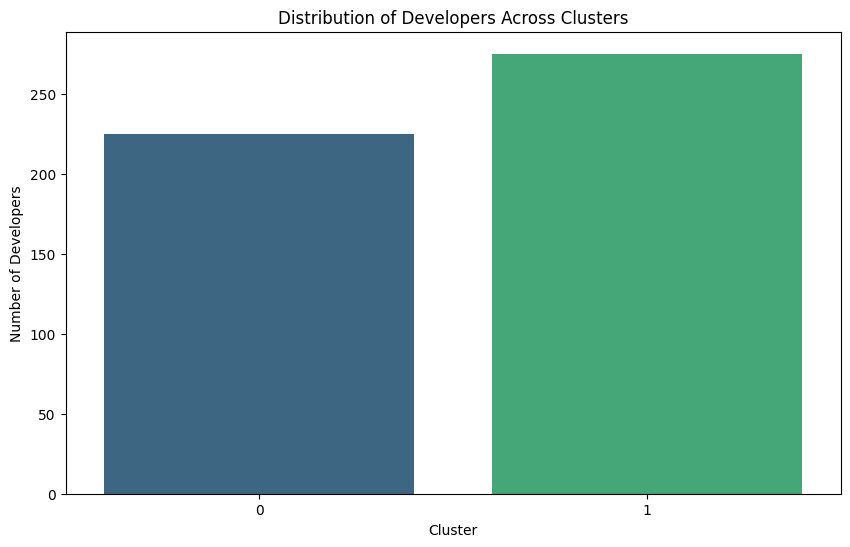

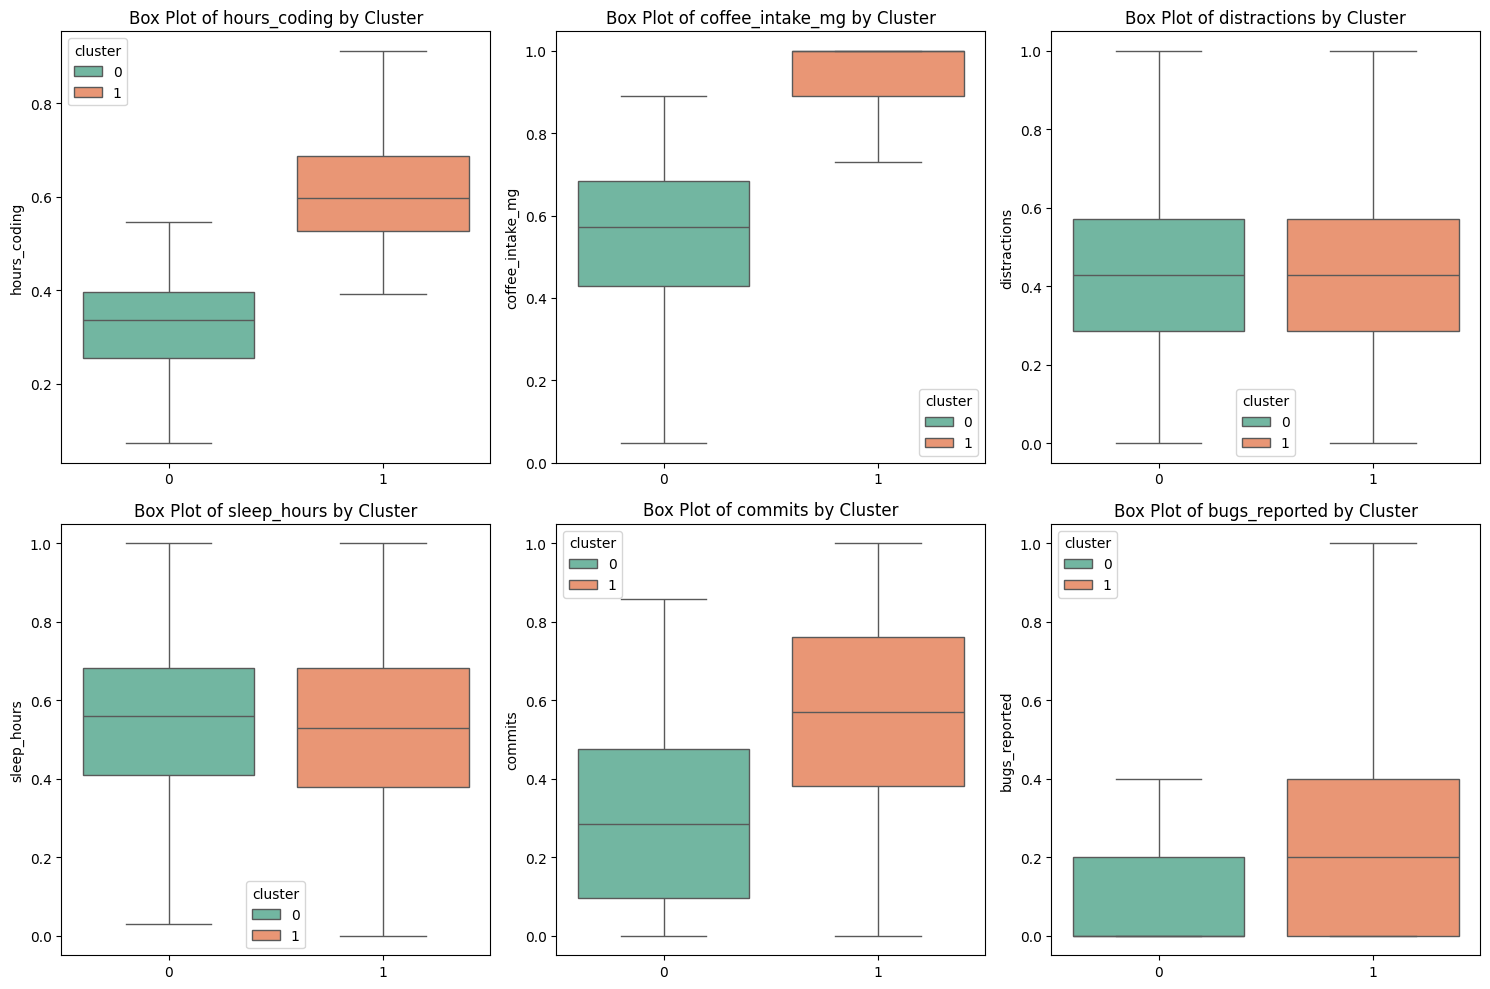

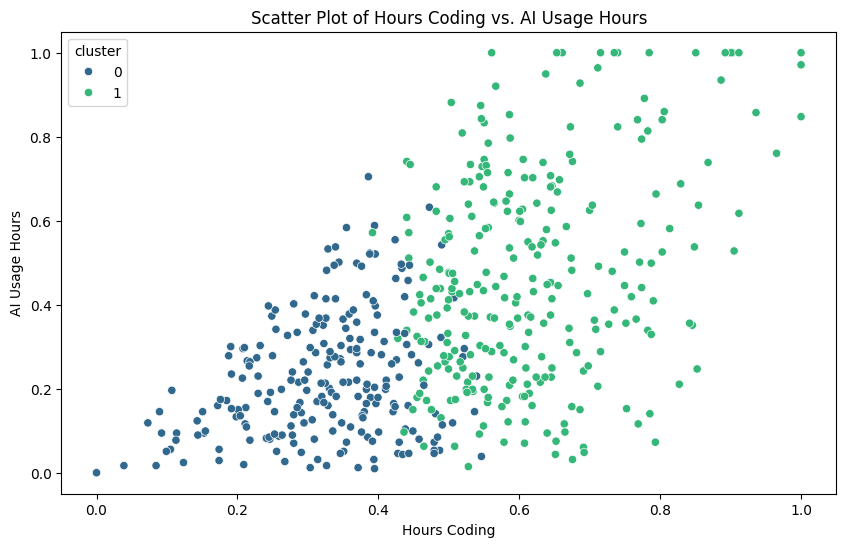

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot matrix
sns.pairplot(df_wrangled, hue='cluster', vars=features_for_clustering[:5], height=2)
plt.suptitle('Scatter Plot Matrix of Features Colored by Cluster', y=1.02)
plt.show()

# 2. Bar chart of cluster distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df_wrangled, palette="viridis") #Corrected palette usage
plt.title('Distribution of Developers Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Developers')
plt.show()

# 3. Box plots of key features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_for_clustering[:6]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='cluster', y=feature, data=df_wrangled, hue='cluster', palette="Set2", showfliers=False)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('')
plt.tight_layout()
plt.show()

# 4. Additional visualization: Scatter plot of two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hours_coding', y='ai_usage_hours', hue='cluster', data=df_wrangled, palette="viridis")
plt.title('Scatter Plot of Hours Coding vs. AI Usage Hours')
plt.xlabel('Hours Coding')
plt.ylabel('AI Usage Hours')
plt.show()

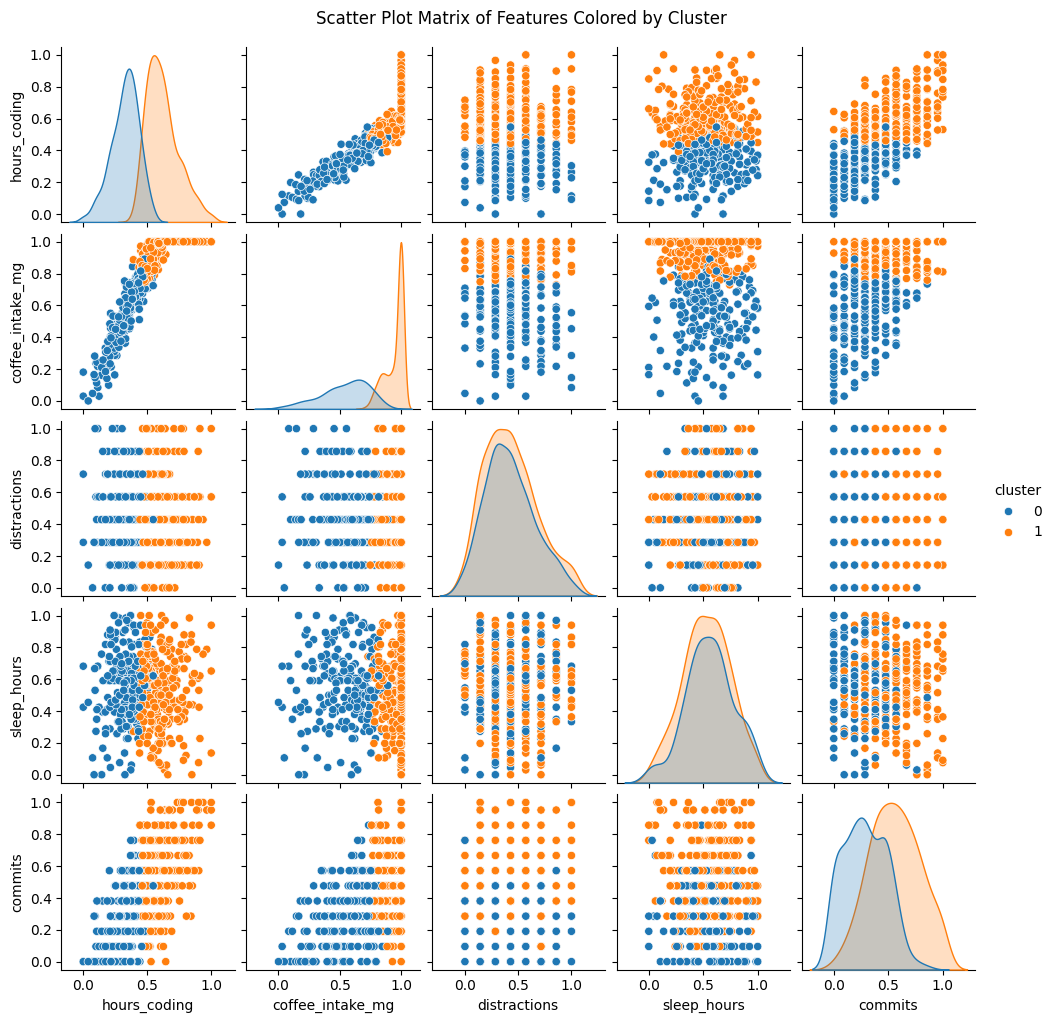

<ipython-input-16-df8d9a882f03>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df_wrangled, palette="viridis", legend=False) # Added legend=False


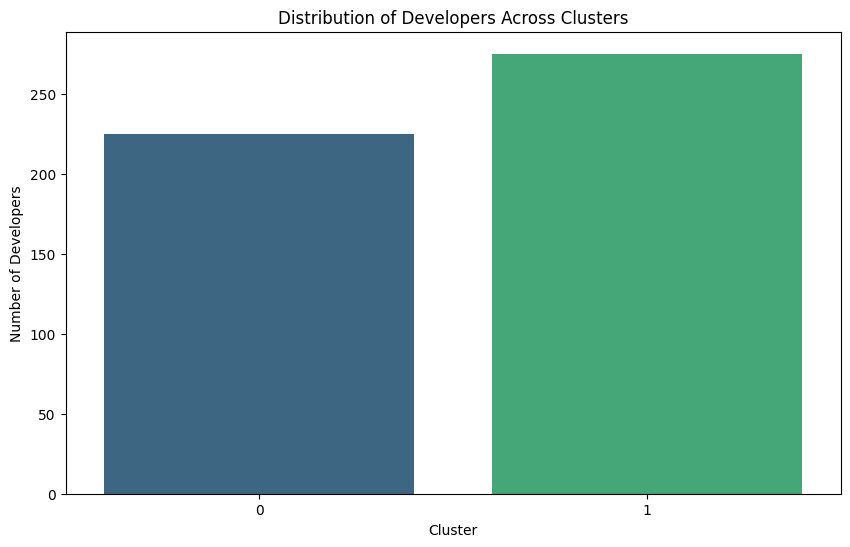

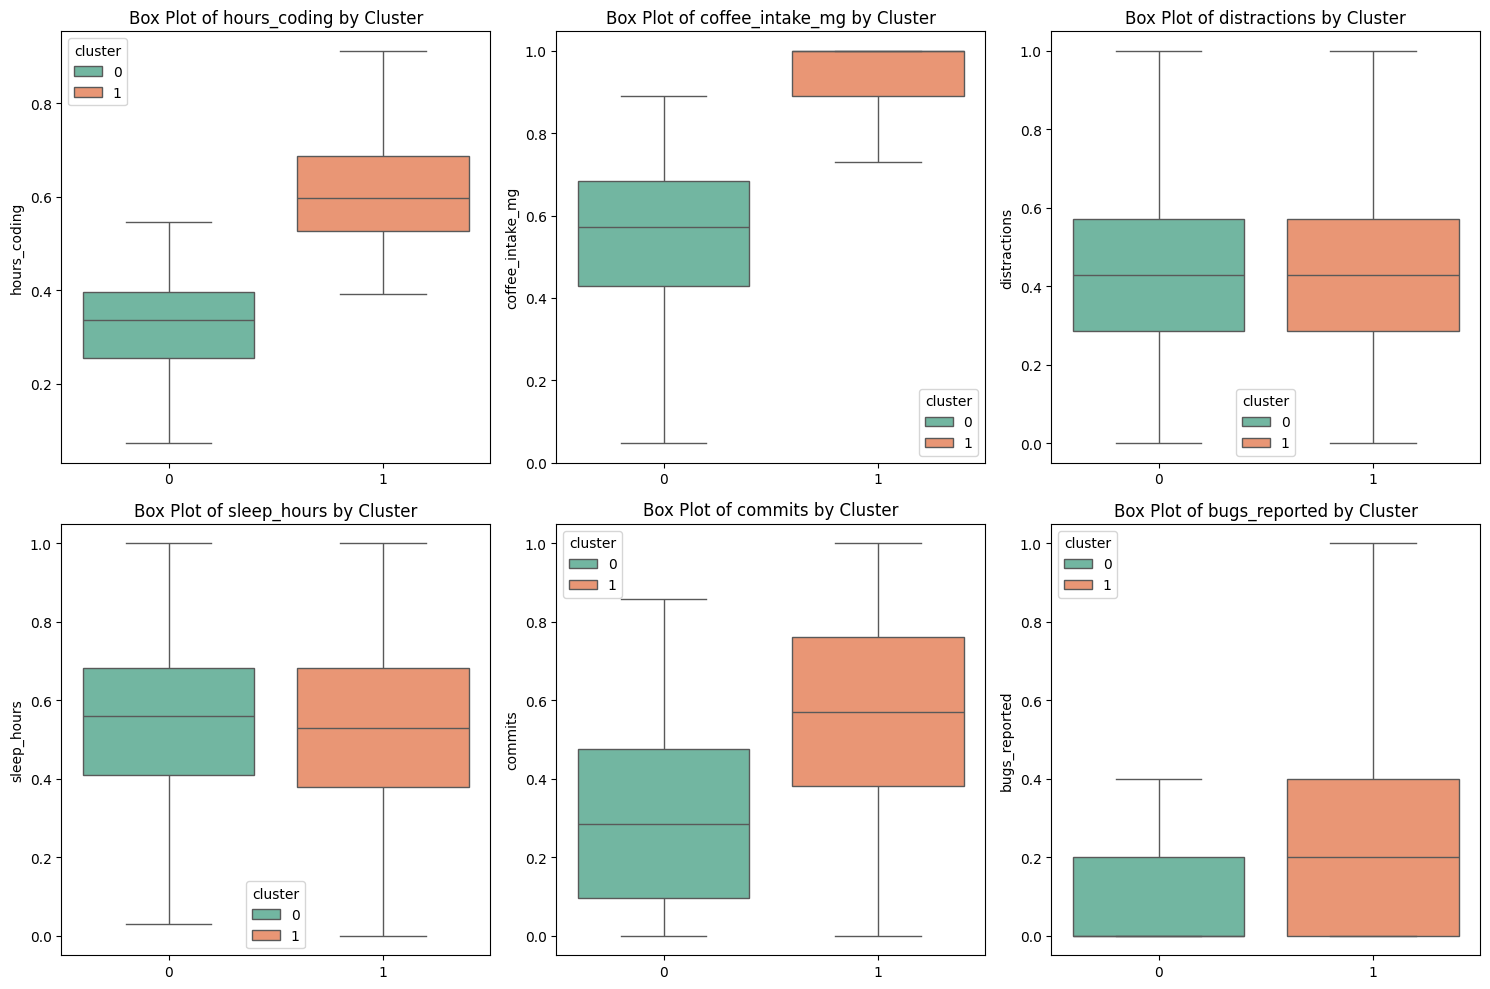

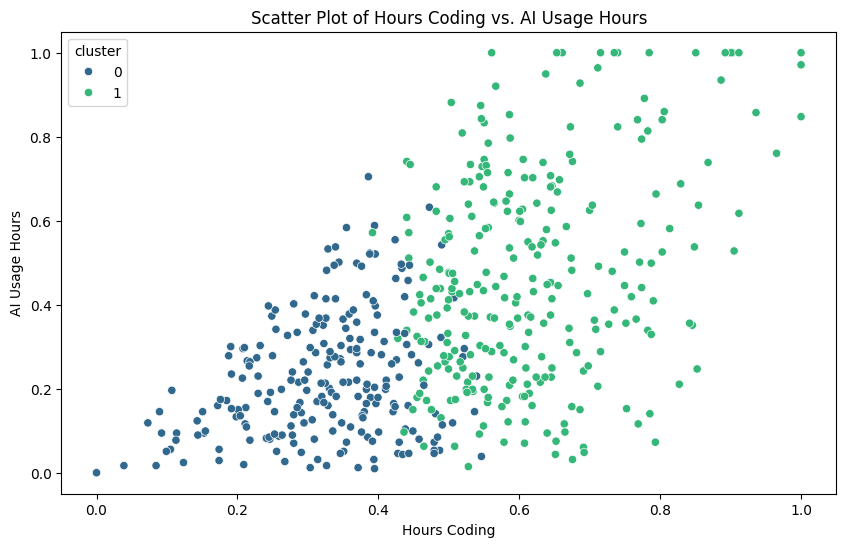

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot matrix
sns.pairplot(df_wrangled, hue='cluster', vars=features_for_clustering[:5], height=2)
plt.suptitle('Scatter Plot Matrix of Features Colored by Cluster', y=1.02)
plt.show()

# 2. Bar chart of cluster distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df_wrangled, palette="viridis", legend=False) # Added legend=False
plt.title('Distribution of Developers Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Developers')
plt.show()

# 3. Box plots of key features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_for_clustering[:6]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='cluster', y=feature, data=df_wrangled, hue='cluster', palette="Set2", showfliers=False)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('')
plt.tight_layout()
plt.show()

# 4. Additional visualization: Scatter plot of two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hours_coding', y='ai_usage_hours', hue='cluster', data=df_wrangled, palette="viridis")
plt.title('Scatter Plot of Hours Coding vs. AI Usage Hours')
plt.xlabel('Hours Coding')
plt.ylabel('AI Usage Hours')
plt.show()

## Summary:

### Q&A
* **What is the best model for predicting developer success?** Based on the F1-score, the Random Forest Classifier was initially identified as the best model. After hyperparameter tuning and evaluation on the test set, both Random Forest and Gradient Boosting achieved a perfect F1-score of 1.0.

* **Which model performs best for predicting cognitive load?**  Linear Regression demonstrated the lowest RMSE on the test set, making it the preferred model for cognitive load prediction.

* **How many clusters were identified in the developer behavior analysis?** The optimal number of clusters, determined by silhouette analysis, was two.

### Data Analysis Key Findings
* **Data Cleaning:** Outliers in numerical features were handled using the IQR method, and missing values (if any) were imputed using the median.
* **Feature Engineering:** New features like `coding_ai_interaction`, `coffee_squared`, and `sleep_quality` were created to potentially improve model performance.
* **Model Performance (Classification):**  After hyperparameter tuning, both Random Forest and Gradient Boosting achieved a perfect F1-score of 1.0 on the test set for predicting developer success.
* **Model Performance (Regression):** Linear Regression achieved the lowest RMSE (0.1121) on the test set for predicting cognitive load.
* **Clustering Analysis:** K-means clustering identified two distinct developer groups based on their behavioral patterns, with a silhouette score of 0.28.  Cluster 0 had lower average values for most features compared to cluster 1.

### Insights or Next Steps
* **Investigate Feature Importance:** Analyze feature importance from the best-performing classification models (Random Forest and Gradient Boosting) to understand which factors most strongly influence developer success.
* **Deep Dive into Clusters:** Explore the characteristics of the two identified developer clusters in more detail. Investigate whether these clusters correlate with other relevant metrics or demographics (if available).
